<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/Datos/O2_Notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Analisis de comportmiento de Uso del Oxigeno en Siderca***


---





In [ ]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image


### ***Esquema de flujo Praxair _ Siderca:***

---



Mounted at /content/drive


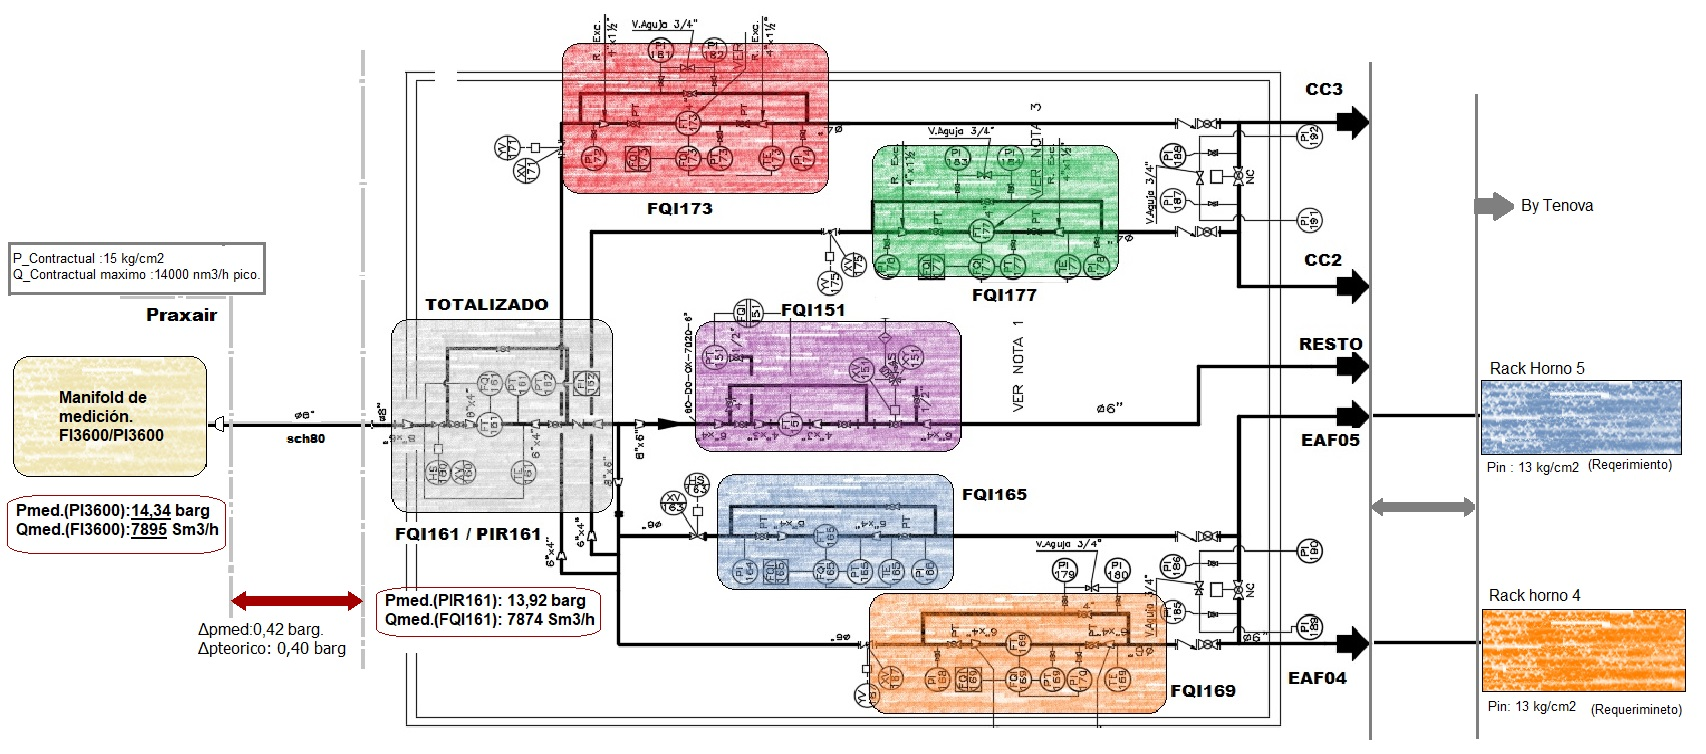

In [ ]:
#@title "Ejecutar para recargar imagen"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Image('/content/drive/MyDrive/Colab Notebooks/ESQUEMA ENTRADA.jpg')

## ***Carga de datos y analisis rapidos***

---



In [ ]:
#@title "Ejecutar Celda"
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/MUESTRA%20TOTAL%201022.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values
for i in range (len(dfx['FQI151'])):
     if (dfx['FQI151'].values[i])<=0:
         dfx['FQI151'].values[i]=0



         #print(dfx['FQI151'].values[i])
#print(dfx.loc[dfx['FQI151']==0])
#print(dfx)

In [ ]:
#@title Analisis rapidos del data_set completo
a=np.array(round(dfx.FQI161.describe(),2))
b=np.array(round(dfx.PIR161.describe(),2))
c=np.array(round(dfx.FQI165.describe(),2))
d=np.array(round(dfx.FQI169.describe(),2))
e=np.array(round(dfx.FQI177.describe(),2))
f=np.array(round(dfx.FQI173.describe(),2))
g=np.array(round(dfx.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )
TABLA1(dfD)
#@title Maximos y minimos de intervalo dado:
nvalue = 4 #@param {type:"number"}
Instrumento = 'FQI161' #@param {type:"raw"}
dfx = dfx #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)
dfmax

Analisis rapidos.


,indice,Date,Time,FQI161,PIR161,FQI165,FQI169,FQI177,FQI173,FQI151
22992,22993,10/24/2022,10/24/2022 22:47:59,14195.78,12.90,6410.80,5051.89,286.56,177.00,2269.53
23682,23683,10/25/2022,10/25/2022 16:02:59,14093.94,12.80,6400.47,5039.89,475.56,150.90,2027.13
20721,20722,10/22/2022,10/22/2022 14:01:29,14043.71,11.58,6290.08,5038.89,195.27,124.88,2394.59
26839,26840,10/28/2022,10/28/2022 22:58:29,14008.88,12.70,6361.47,5010.67,323.93,164.38,2148.43


## ***Analisis de la dispersión CAUDAL VS PRESION en instrumentos de entreda (FQI161/PIR161)***

---



In [ ]:
from pandas.core.aggregation import reconstruct_func
from io import DEFAULT_BUFFER_SIZE
#@title Seleccionar parametros y ejecuar celda

#Time=np.array((0,len(dfx.index)))
#np.array(dfx.Date.values+' '+str(dfx.hour.values))#+':'+str(dfx.minute.values)+':'+str(dfx.second.values))

InstrumentoParametro = 'PIR161' #@param {type:"raw"}
x = 'FQI161' #@param {type:"raw"}
y = 'PIR161' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
choice=False
Secciones = "13;13.5;14" #@param {type:"string"}
zoom = True
Intervalo = "14;14.2" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))
print('Cantidad de items sampleados: ', len(dfx.index))
print('Fecha de la muestra: ',dfx.Date[0], 'al',dfx.Date[(len(dfx.index)-1)])
print('Muestreo cada 1 minuto 30 seg ')

#------------------FIGURA 1
fig1, ax = plt.subplots(1, figsize=(70,40))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]

ax.set_xlabel(text,fontsize=50)
ax.set_ylabel(text1,fontsize=50)

ax.scatter(dfa[x],dfa[y],color='crimson',s=100,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=100,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=100,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=100,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
  ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')

labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Diagrama de dispersión',fontsize=50)
ax.axhline(y=14,linewidth=4,color='black')
ax.axhline(y=13,linewidth=6,color='red')

#------------------figura 2
figB, (ax1)= plt.subplots(1, figsize=(70,40))
ax1.plot(dfx.index,dfx['PIR161'])
ax1.set_title('Presión f(Tiempo) ',fontsize=50)
ax1.set_xlabel(text2,fontsize=50)
ax1.set_ylabel(text1,fontsize=50)
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.axhline(y=14,linewidth=4,color='black')
ax1.axhline(y=13,linewidth=6,color='red')
labels2 = ax1.get_xticklabels()
labels3= ax1.get_yticklabels()
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels3,fontsize=30, horizontalalignment='right')
ax1.axes.grid(True, which='minor',color='grey',axis='both')
ax1.axes.grid(True, which='major',color='black',axis='both')

plt.show()



ModuleNotFoundError: ignored

## ***Curvas de Caudal en intervalos diarios y parciales:***

---



<ipython-input-18-5c2a5df579bd>:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-5c2a5df579bd>:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-5c2a5df579bd>:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-5

Cantidad de items sampleados:  960
Fecha de la muestra:  10/16/2022 0:00:00 al 10/16/2022 23:58:29
sampleo cada 1 min 30 seg
Maximo Horno 6 con secusncia Tenova :  [7995.]
Maximo total con Horno 6 :  [17136.16]
Probabilidad >17000:  1
 


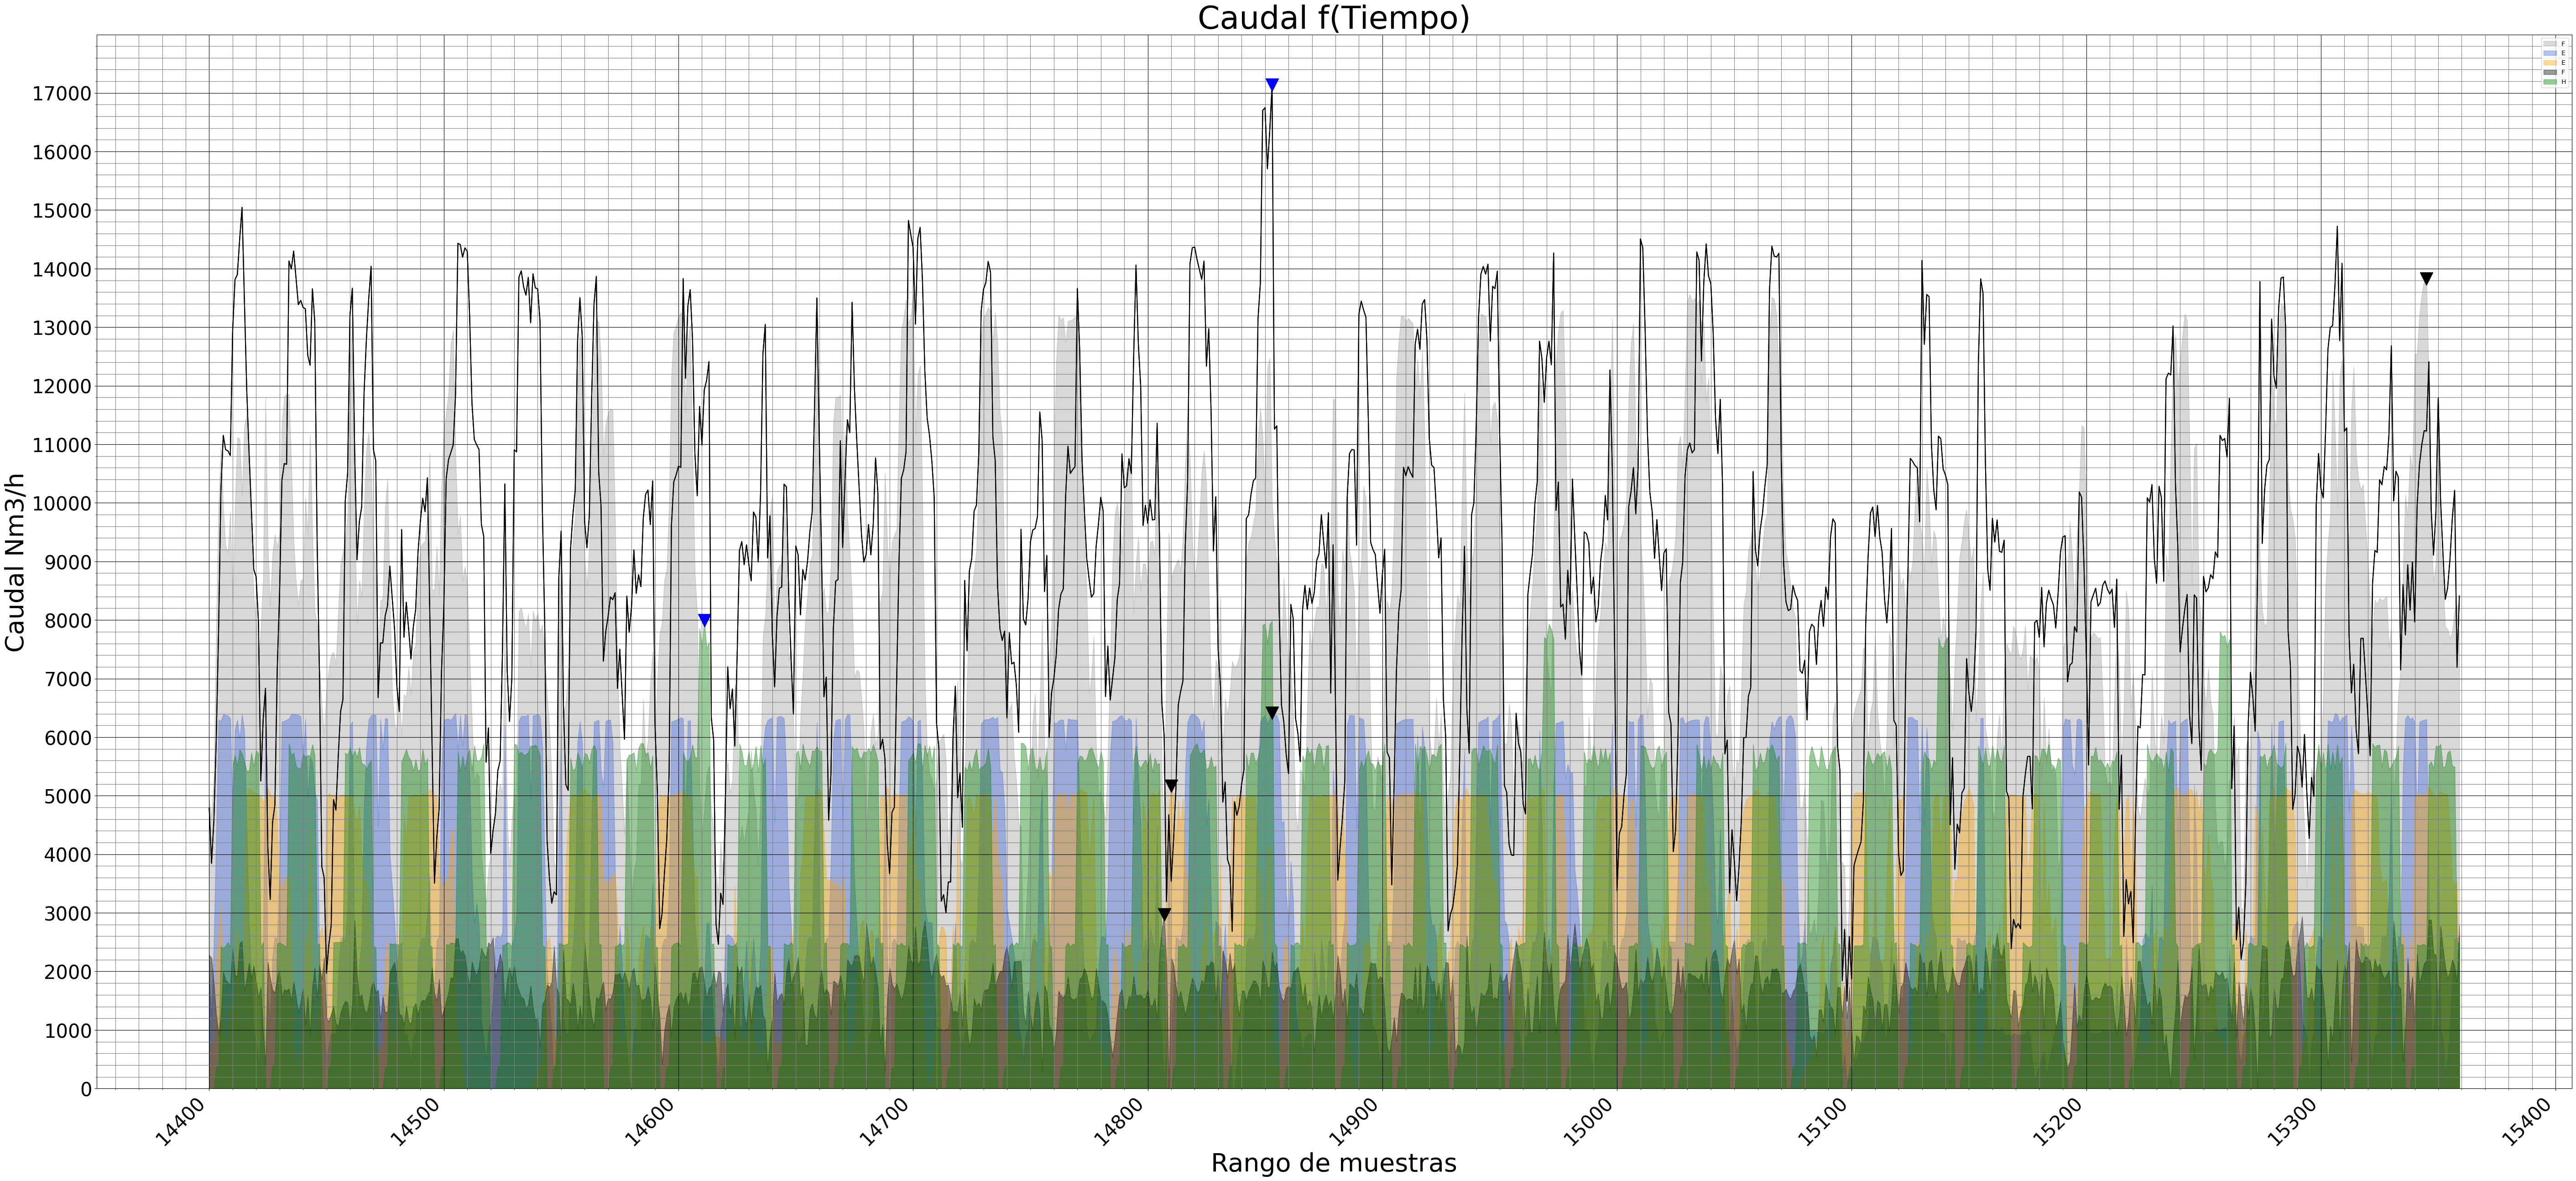

In [ ]:
from matplotlib.mathtext import MathtextBackend
from pandas._libs.writers import max_len_string_array
from prompt_toolkit.layout.dimension import max_layout_dimensions
from numpy.lib.twodim_base import triu_indices_from
#@title "Ejecutar Celda"
dfs=dfx.copy()

Celda = 'Date' #@param {type:"raw"}
Dia = '10/16/2022' #@param {type:"raw"}
#@markdown Simulación HORNO 6
#M_unitaria = False #@param {type:"boolean"}
Grafica = False #@param {type:"boolean"}
#@markdown Cantidad de iteraciones.
iteraciones = 100 #@param {type:"integer"}
Iterar = True #@param {type:"boolean"}
#@markdown Selección de graficas a visualizar
Total_Normal = True #@param {type:"boolean"}
EAF5 = True #@param {type:"boolean"}
EAF4 = True #@param {type:"boolean"}
Resto = True #@param {type:"boolean"}
PERFIL_TENOVA = True #@param {type:"boolean"}
PERFIL_TE_TOTAL = True #@param {type:"boolean"}
Pressure = False #@param {type:"boolean"}
con=0
Secuencia1=[40,3,2,5,7,5,2]
#Secuencia2=[1,133,54,213,280,200,80]

Aux1=dfs.loc[dfs.loc[:,Celda]==Dia]


#-------- Simulación de muestreo H06
def sampleo (sec):
    r=False
    s=[]
    con=0
    for j in range (sec[0]):
      for i in range(sec[1]):
          r=True
          while r :
              op=np.random.choice(2, 1 )
              if (op >=0 and op<=1):
                r=False
                s=np.array(np.append(s,op,axis=0))
      for i in range(sec[2]):
          r=True
          while r :
            op=np.random.choice(400, 1 )
            if (op >=350 and op<=400):
              r=False
              s=np.array(np.append(s,op,axis=0))
      for i in range(sec[3]):
        r=True
        while r :
          op=np.random.choice(2600, 1 )
          if (op >=2400 and op<=2500):
            r=False
            s=np.array(np.append(s,op,axis=0))
      for i in range(sec[4]):
        r=True
        while r :
          op=np.random.choice(6000, 1 )
          if (op >=5400 and op<=5900):
            r=False
            s=np.array(np.append(s,op,axis=0))
      u=np.random.choice(2 ,1,p=[0.9,0.1]) #posibilidad de picos.
      if u==0:  #si no es pico
        for i in range(sec[5]):
         r=True
         while r :
          op=np.random.choice(6000, 1 )
          if (op >=5400 and op<=5900):
            r=False
            s=np.array(np.append(s,op,axis=0))
      else:
        for i in range(sec[5]): #si es Pico de consumo
         r=True
         while r :
          op=np.random.choice(8000, 1 )
          if (op >=7500 and op<=8000):
            r=False
            s=np.array(np.append(s,op,axis=0))

      for i in range(sec[6]):
        r=True
        while r :
          op=np.random.choice(2600, 1 )
          if (op >=2400 and op<=2500):
            r=False
            s=np.array(np.append(s,op,axis=0))
      if u==1:
         con=con+1
    #print('cantidad de picos aletorios:',cont1)
    return s
#--------------------------------------------------------


#---------------------------------
if Iterar:
    Prov = 0
    for z in range(iteraciones):
        o = sampleo(Secuencia1)

        # Utiliza .loc para asignar valores a las columnas específicas en Aux1
        Aux1.loc[:,'HORNO_6'] = o
        Aux1.loc[:,'TOT_HO6'] = Aux1.loc[:,'FQI165'] + Aux1.loc[:,'FQI173'] + Aux1.loc[:,'FQI177'] + Aux1.loc[:,'FQI151'] + Aux1.loc[:,'HORNO_6']

        if z == 0:
            Aux2 = Aux1.copy()
            max = Aux1.nlargest(1,'TOT_HO6')
            if max['TOT_HO6'].values >= 17000:
                Prov = Prov + 1
        else:
            maxA = Aux1.nlargest(1,'TOT_HO6')
            maxB = Aux2.nlargest(1,'TOT_HO6')

            if maxA['TOT_HO6'].values >= maxB['TOT_HO6'].values:
                Aux2 = Aux1.copy()
                if maxA['TOT_HO6'].values >= 17000:
                    Prov = Prov + 1

    Aux1 = Aux2.copy()
else:
    o = sampleo(Secuencia1)

# Utiliza .loc para asignar valores a las columnas específicas en Aux1
    Aux1.loc[:,'HORNO_6'] = o
    Aux1.loc[:,'TOT_HO6'] = Aux1['FQI165'] + Aux1['FQI173'] + Aux1['FQI177'] + Aux1['FQI151'] + Aux1['HORNO_6']





#-------- graficar
if Pressure==True:
  figB, (ax,ax1)= plt.subplots(2,1, figsize=(70,40))
else:
  figB, (ax)= plt.subplots(1, figsize=(70,30))

text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
#------- scatter
ax.set_title('Caudal f(Tiempo)',fontsize=50)
ax.set_xlabel(text2,fontsize=40)
ax.set_ylabel(text,fontsize=40)
labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels()

plt.setp(labels1,fontsize=30, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')

ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(200),)
ax.xaxis.set_major_locator(MultipleLocator(100),)
ax.xaxis.set_minor_locator(MultipleLocator(10),)

ax.axes.grid(True, which='minor',color='grey',axis='y')
ax.axes.grid(True, which='major',color='black',axis='y')
ax.axes.grid(True, which='minor',color='grey',axis='x')
ax.axes.grid(True, which='major',color='black',axis='x')

#---- graficar si

if Total_Normal==True:
   ax.stackplot(Aux1.index,Aux1['FQI161'],alpha=0.3,color='grey',labels="FQI161")
   Maximo=Aux1.nlargest(1,'FQI161')
   ax.plot(Maximo.index,Maximo.FQI161, 'v',markersize=20, color='black')

if EAF5==True:
   ax.stackplot(Aux1.index,Aux1['FQI165'],alpha=0.4,color='royalblue',labels="EAF5")
   Max5=Aux1.nlargest(1,'FQI165')
   ax.plot(Max5.index,Max5.FQI165, 'v',markersize=20, color='black')

if EAF4==True:
   ax.stackplot(Aux1.index,Aux1['FQI169'],alpha=0.4,color='orange',labels="EAF4")
   Max4=Aux1.nlargest(1,'FQI169')
   ax.plot(Max4.index,Max4.FQI169, 'v',markersize=20, color='black')

if Resto==True:
   ax.stackplot(Aux1.index,Aux1['FQI151'],alpha=0.4,color='black',labels="FQI151")
   MaxR=Aux1.nlargest(1,'FQI151')
   ax.plot(MaxR.index,MaxR.FQI151, 'v',markersize=20, color='black')

if PERFIL_TENOVA==True:
   ax.stackplot(Aux1.index,Aux1['HORNO_6'],alpha=0.4,color='green',labels="HORNO_6")
   Max6=Aux1.nlargest(1,'HORNO_6')
   ax.plot(Max6.index,Max6.HORNO_6, 'v',markersize=20, color='blue')

if PERFIL_TE_TOTAL==True:
   ax.plot(Aux1.index,Aux1['TOT_HO6'],Aux1.TOT_HO6,color='black')
   MaxT6=Aux1.nlargest(1,'TOT_HO6')
   ax.plot(MaxT6.index,MaxT6.TOT_HO6, 'v',markersize=20, color='blue')


#----- Plot
if Pressure==True:

  ax1.set_title('Presión f(Tiempo)',fontsize=50)
  ax1.set_xlabel(text2,fontsize=40)
  ax1.set_ylabel(text1,fontsize=40)
  ax1.plot(Aux1.index,Aux1['PIR161']) # Grafica
  labels = ax1.get_xticklabels()
  labels3 = ax1.get_yticklabels()
  plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')

  ax1.yaxis.set_minor_locator(MultipleLocator(0.125),)
  ax1.axes.grid(True, which='minor',color='grey',axis='y')
  ax1.axes.grid(True, which='major',color='black',axis='y')
  ax1.axes.grid(True, which='minor',color='grey',axis='x')
  ax1.axes.grid(True, which='major',color='black',axis='x')
  ax1.xaxis.set_major_locator(MultipleLocator(100),)
  ax1.xaxis.set_minor_locator(MultipleLocator(20),)

  plt.setp(labels3,fontsize=30, horizontalalignment='right')
  plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')

ax.legend(fontsize=10)
figB.show()

t=np.linspace(0, 960, num=960)

if Grafica==1:
    fig1, ax = plt.subplots(1, figsize=(70,40))
    ax.plot(t,o)
    ax.yaxis.set_major_locator(MultipleLocator(500),)
    ax.yaxis.set_minor_locator(MultipleLocator(10),)
    ax.xaxis.set_major_locator(MultipleLocator(10),)
    ax.xaxis.set_minor_locator(MultipleLocator(5),)

    #ax.axes.grid(True, which='minor',color='grey',axis='y')
    ax.axes.grid(True, which='major',color='black',axis='y')
    ax.axes.grid(True, which='minor',color='grey',axis='x')
    ax.axes.grid(True, which='major',color='black',axis='x')
    plt.show()



print('Cantidad de items sampleados: ', len(Aux1.index))
print('Fecha de la muestra: ',Aux1.Time.values[0], 'al',Aux1.Time.values[(len(Aux1.index)-1)])
print('sampleo cada 1 min 30 seg')
print('Maximo Horno 6 con secuencia Tenova : ',Max6.HORNO_6.values)
print('Maximo total con Horno 6 : ',MaxT6.TOT_HO6.values)
if Iterar==True:
 print('Probabilidad >17000: ',Prov)
print(' ')



